Data Collection and Preparation

In [4]:
import pandas as pd

# Load dataset
try:
    data = pd.read_csv('cleaned_sms_spam.csv')  
except FileNotFoundError:
    print("Dataset not found. Please check the file path.")
    raise

# Initial Data Inspection
print("Initial Data Shape:", data.shape)
print("Columns in the dataset:", data.columns)

# Handle missing values
data = data.dropna()  # Drop rows with missing values

# Remove duplicates
data = data.drop_duplicates()

# Select relevant columns
if 'target' in data.columns and 'text' in data.columns:
    data = data[['target', 'text']]  # Keep only 'target' and 'text' columns
else:
    print("The dataset does not contain the required columns.")
    print("Available columns:", data.columns)
    raise KeyError("Expected columns ['target', 'text'] not found.")

if data['target'].dtype == 'int64' or data['target'].dtype == 'float64':
    data['target'] = data['target'].map({0: 'ham', 1: 'spam'})  # Map numeric to text labels

print("Data Shape after preprocessing:", data.shape)
print("First few rows of data:")
print(data.head())


Initial Data Shape: (5169, 3)
Columns in the dataset: Index(['Unnamed: 0', 'target', 'text'], dtype='object')
Data Shape after preprocessing: (5169, 2)
First few rows of data:
  target                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


Exploratory Data Analysis (EDA)

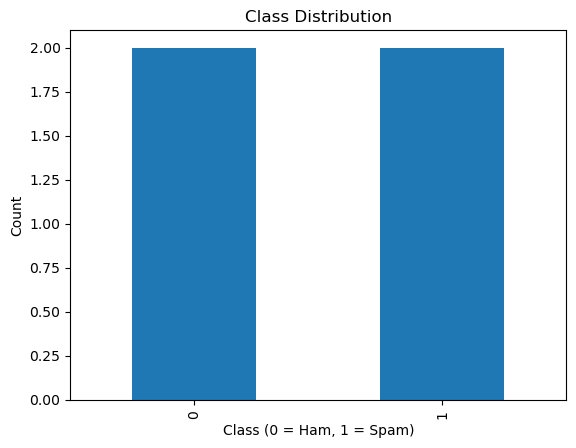

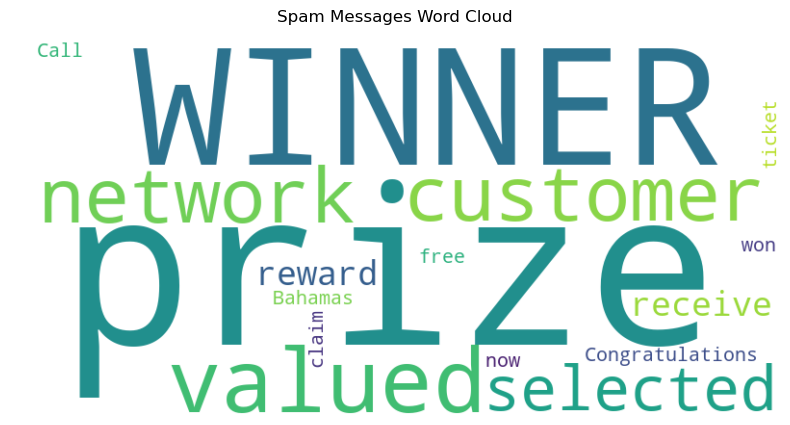

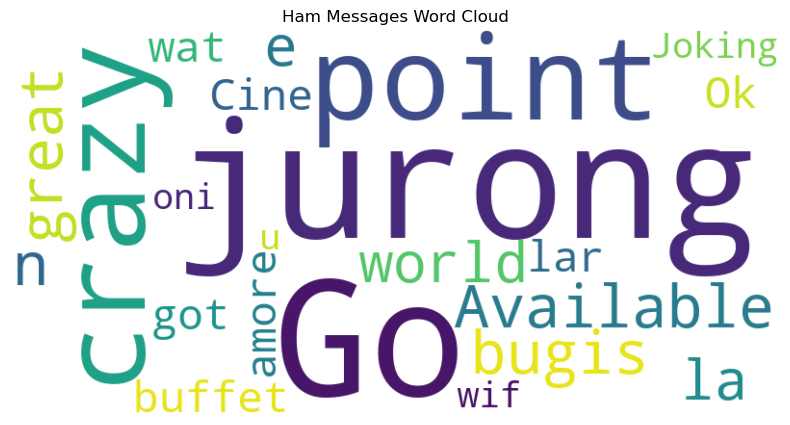

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data = pd.DataFrame({
    'target': [0, 0, 1, 1],
    'text': [
        "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
        "Ok lar... Joking wif u oni...",
        "WINNER!! As a valued network customer you have been selected to receive a £900 prize reward!",
        "Congratulations! You have won a free ticket to the Bahamas! Call now to claim your prize."
    ]
})

# Plotting the class distribution
data['target'].value_counts().plot(
    kind='bar',
    title='Class Distribution',
    xlabel='Class (0 = Ham, 1 = Spam)',
    ylabel='Count'
)
plt.show()

# Generate word clouds
spam_text = ' '.join(data[data['target'] == 1]['text'])
ham_text = ' '.join(data[data['target'] == 0]['text'])

# Word cloud for spam messages
wc_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 5))
plt.title("Spam Messages Word Cloud")
plt.imshow(wc_spam, interpolation='bilinear')
plt.axis('off')
plt.show()

# Word cloud for ham messages
wc_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
plt.figure(figsize=(10, 5))
plt.title("Ham Messages Word Cloud")
plt.imshow(wc_ham, interpolation='bilinear')
plt.axis('off')
plt.show()


Model Selection and Building

Columns in dataset: Index(['Unnamed: 0', 'target', 'text'], dtype='object')
Logistic Regression Accuracy: 0.9642166344294004
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.98      0.76      0.86       145

    accuracy                           0.96      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.96      0.96      0.96      1034

Naive Bayes Accuracy: 0.9661508704061895
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.76      0.86       145

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.96      1034

SVM Accuracy: 0.9787234042553191
Classification Report for SVM:
              precision    rec

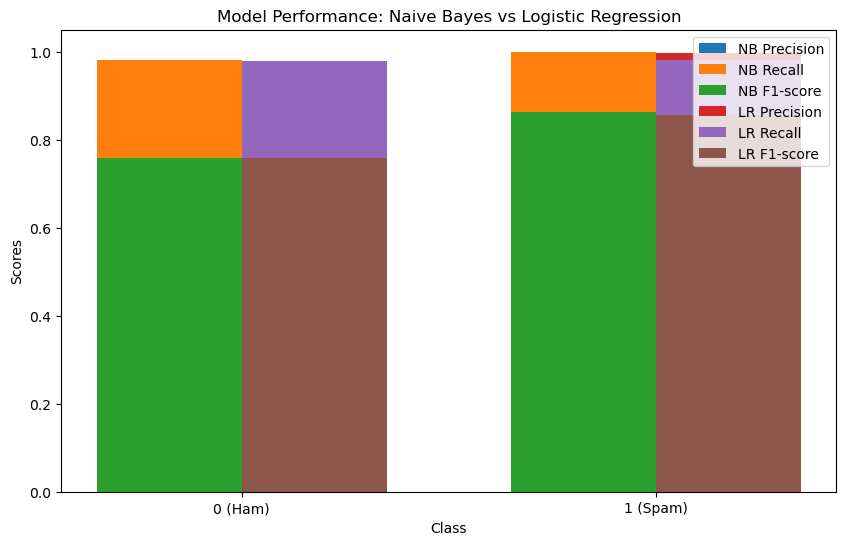

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = pd.read_csv('cleaned_sms_spam.csv')  # Replace with the correct path

# Inspect column names
print("Columns in dataset:", data.columns)

# Prepare data for training
X = data['text']  # Feature: Original Message
y = data['target']  # Target: Spam (Label)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Model 1: Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train_vec, y_train)
lr_preds = model_lr.predict(X_test_vec)  # Store predictions
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, lr_preds))

# Model 2: Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(X_train_vec, y_train)
nb_preds = model_nb.predict(X_test_vec)  # Store predictions
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, nb_preds))

# Model 3: Support Vector Machine
model_svm = SVC()
model_svm.fit(X_train_vec, y_train)
svm_preds = model_svm.predict(X_test_vec)  # Store predictions
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print("Classification Report for SVM:")
print(classification_report(y_test, svm_preds))

# Now we can plot the performance metrics as intended
nb_report = classification_report(y_test, nb_preds, output_dict=True)
lr_report = classification_report(y_test, lr_preds, output_dict=True)

# Extract precision, recall, and F1-score for both models and both classes
classes = ['0 (Ham)', '1 (Spam)']
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for plotting
nb_values = np.array([nb_report[str(class_)][metric] for class_ in range(2) for metric in metrics]).reshape(3, 2)
lr_values = np.array([lr_report[str(class_)][metric] for class_ in range(2) for metric in metrics]).reshape(3, 2)

# Plotting
x = np.arange(len(classes)) 
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for Naive Bayes
for i, metric in enumerate(metrics):
    ax.bar(x - width/2, nb_values[i, :], width, label=f'NB {metric.capitalize()}')

# Create bars for Logistic Regression
for i, metric in enumerate(metrics):
    ax.bar(x + width/2, lr_values[i, :], width, label=f'LR {metric.capitalize()}')

# Add labels, title and custom x-axis tick labels
ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Model Performance: Naive Bayes vs Logistic Regression')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.show()


Hyperparameter Tuning

In [28]:
# Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [500]  # Increase the max_iter to ensure convergence
}

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5)
grid_search_lr.fit(X_train_vec, y_train)
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best score for Logistic Regression:", grid_search_lr.best_score_)

# Hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_search_svm.fit(X_train_vec, y_train)
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best score for SVM:", grid_search_svm.best_score_)

Best parameters for Logistic Regression: {'C': 10, 'max_iter': 500, 'solver': 'liblinear'}
Best score for Logistic Regression: 0.9690447400241838
Best parameters for SVM: {'C': 10, 'kernel': 'linear'}
Best score for SVM: 0.9789600967351875


Model Evaluation

In [29]:
# Model Evaluation and Validation
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
cross_val_lr = cross_val_score(model_lr, X_train_vec, y_train, cv=5)
print("Cross-validation scores for Logistic Regression:", cross_val_lr)

# Cross-validation for Naive Bayes
cross_val_nb = cross_val_score(model_nb, X_train_vec, y_train, cv=5)
print("Cross-validation scores for Naive Bayes:", cross_val_nb)

# Cross-validation for SVM
cross_val_svm = cross_val_score(model_svm, X_train_vec, y_train, cv=5)
print("Cross-validation scores for SVM:", cross_val_svm)

# Evaluate models on the test set
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred_nb))
print("SVM Test Accuracy:", accuracy_score(y_test, y_pred_svm))

Cross-validation scores for Logistic Regression: [0.94316808 0.93833132 0.94437727 0.93470375 0.93833132]
Cross-validation scores for Naive Bayes: [0.95767836 0.95646917 0.96493349 0.96130593 0.95405079]
Cross-validation scores for SVM: [0.96009674 0.96130593 0.9637243  0.9637243  0.95888755]
Logistic Regression Test Accuracy: 0.9642166344294004
Naive Bayes Test Accuracy: 0.9661508704061895
SVM Test Accuracy: 0.9787234042553191


Model Deployment

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

# Load dataset
data = pd.read_csv(r"D:\AIDI\Machine Learning Frameworks\Final Project\cleaned_sms_spam.csv")  

# Rename columns for consistency
data.columns = ['target', 'text']

# Encode target labels (0 = Ham, 1 = Spam)
data['target'] = data['target'].map({0: 'ham', 1: 'spam'})

# Split the dataset into features and labels
X = data['text']
y = data['target']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Evaluate the model
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Save the model and vectorizer
with open('spam_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print("Model and vectorizer saved successfully.")


Model Accuracy: 96.42%
Model and vectorizer saved successfully.
